In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

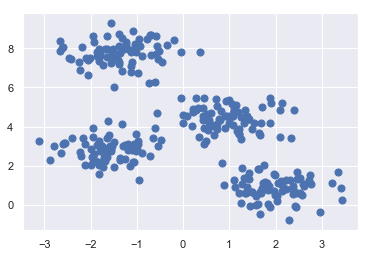

In [2]:
# 数据
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.60, random_state = 0)
plt.scatter(X[:, 0], X[:, 1], s = 50)

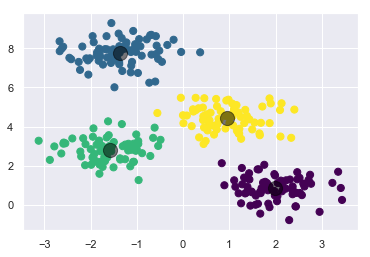

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 50, cmap = 'viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200, alpha = 0.5)

## k-means算法：EM Algorithm(期望最大化)

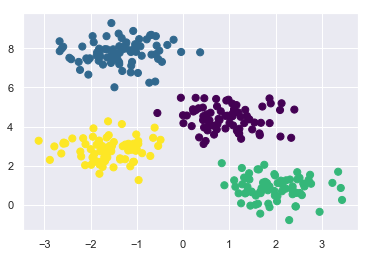

In [4]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed = 2):
    # 1.随机选择簇中心点
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a.基于最近的中心指定标签
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b.根据点的平均值找到新的中心
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        # 2c.确认收敛
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels


centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c = labels, s = 50, cmap = 'viridis')

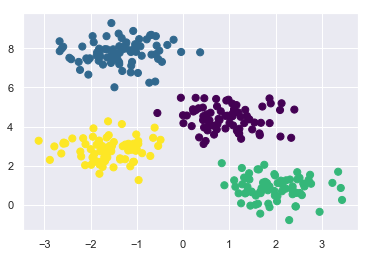

In [5]:
# EM 可能不会达到全局最优解
centers, lables = find_clusters(X, 4, rseed = 20)
plt.scatter(X[:, 0], X[:, 1], c = labels, s = 50, cmap = 'viridis')

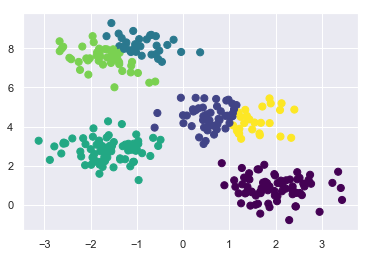

In [6]:
# 簇数量必须事先定好
labels = KMeans(n_clusters = 6, random_state =  0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c = labels, s = 50, cmap = 'viridis')

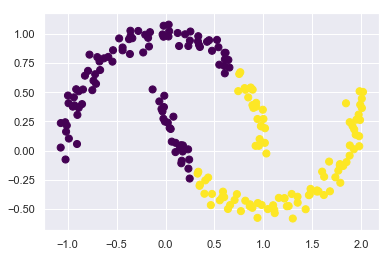

In [7]:
# k-means 算法只能确定线性聚类边界
from sklearn.datasets import make_moons
X, y = make_moons(200, noise = 0.05, random_state = 0)
labels = KMeans(n_clusters = 2, random_state = 0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c = labels, s = 50, cmap = 'viridis')

D:\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


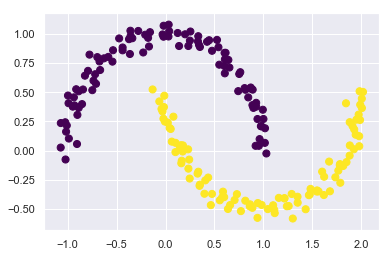

In [10]:
# 核变换方法确定复杂的非线性边界
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters = 2, affinity = 'nearest_neighbors', assign_labels = 'kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c = labels, s = 50, cmap = 'viridis')

In [9]:
# 当数据量较大时，k-means 会很慢

## 案例1：手写数字处理

In [12]:
# 数据
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [13]:
# 聚类
kmeans = KMeans(n_clusters = 10, random_state = 0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

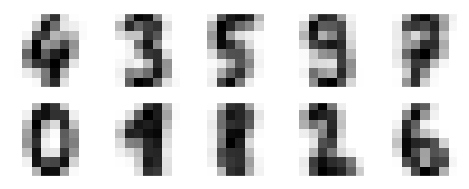

In [21]:
# 簇中心可视化
fig, ax = plt.subplots(2, 5, figsize = (8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks = [], yticks = [])
    axi.imshow(center, interpolation = 'nearest', cmap = plt.cm.binary)

Text(89.18,0.5,'predicted label')

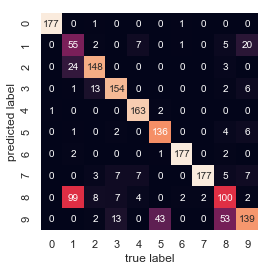

In [22]:
from scipy.stats import mode
labels = np.zeros_like(clusters)
labels
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# 聚类准确率
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

# 混淆矩阵
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, 
            square = True, 
            annot = True, 
            fmt = 'd', 
            cbar = False, 
            xticklabels = digits.target_names, 
            yticklabels = digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [23]:
# t-分布邻域嵌入算法预处理的 k-means(t-SNE)
from sklearn.manifold import TSNE

# 投影数据
tsne = TSNE(n_components = 2, init = 'pca', random_state= 0)
digits_proj = tsne.fit_transform(digits.data)

# 计算类
kmeans = KMeans(n_clusters = 10, random_state = 0)
clusters = kmeans.fit_predict(digits_proj)

# 排列标签
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# 聚类准确度
accuracy_score(digits.target, labels)

0.9371174179187535

## 案例2：色彩压缩